# DBSCAN CLUSTERING WITH CRIME DATA

In [120]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt 
from sklearn.cluster import DBSCAN
import  warnings 

warnings.filterwarnings('ignore')



In [121]:
header_name=['Country','Murder','Assault','UrbanPop','Rape']
cri_data=pd.read_csv("crime_data.csv",header=None,skiprows=[0],names=header_name)
cri_data.head(10) 

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [122]:
cri_data.shape

(50, 5)

In [123]:
cri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [124]:
cri_data.isna().sum()

Country     0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [125]:
cri_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [126]:
cri_data.columns

Index(['Country', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [127]:
cri_data.nunique()

Country     50
Murder      43
Assault     45
UrbanPop    36
Rape        48
dtype: int64

In [128]:
cri_data['Country'].unique

<bound method Series.unique of 0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46 

In [129]:
cri_data['Murder'].unique

<bound method Series.unique of 0     13.2
1     10.0
2      8.1
3      8.8
4      9.0
5      7.9
6      3.3
7      5.9
8     15.4
9     17.4
10     5.3
11     2.6
12    10.4
13     7.2
14     2.2
15     6.0
16     9.7
17    15.4
18     2.1
19    11.3
20     4.4
21    12.1
22     2.7
23    16.1
24     9.0
25     6.0
26     4.3
27    12.2
28     2.1
29     7.4
30    11.4
31    11.1
32    13.0
33     0.8
34     7.3
35     6.6
36     4.9
37     6.3
38     3.4
39    14.4
40     3.8
41    13.2
42    12.7
43     3.2
44     2.2
45     8.5
46     4.0
47     5.7
48     2.6
49     6.8
Name: Murder, dtype: float64>

In [130]:
cri_data['Assault'].unique

<bound method Series.unique of 0     236
1     263
2     294
3     190
4     276
5     204
6     110
7     238
8     335
9     211
10     46
11    120
12    249
13    113
14     56
15    115
16    109
17    249
18     83
19    300
20    149
21    255
22     72
23    259
24    178
25    109
26    102
27    252
28     57
29    159
30    285
31    254
32    337
33     45
34    120
35    151
36    159
37    106
38    174
39    279
40     86
41    188
42    201
43    120
44     48
45    156
46    145
47     81
48     53
49    161
Name: Assault, dtype: int64>

In [131]:
cri_data['UrbanPop'].unique

<bound method Series.unique of 0     58
1     48
2     80
3     50
4     91
5     78
6     77
7     72
8     80
9     60
10    83
11    54
12    83
13    65
14    57
15    66
16    52
17    66
18    51
19    67
20    85
21    74
22    66
23    44
24    70
25    53
26    62
27    81
28    56
29    89
30    70
31    86
32    45
33    44
34    75
35    68
36    67
37    72
38    87
39    48
40    45
41    59
42    80
43    80
44    32
45    63
46    73
47    39
48    66
49    60
Name: UrbanPop, dtype: int64>

In [132]:
cri_data['Rape'].unique

<bound method Series.unique of 0     21.2
1     44.5
2     31.0
3     19.5
4     40.6
5     38.7
6     11.1
7     15.8
8     31.9
9     25.8
10    20.2
11    14.2
12    24.0
13    21.0
14    11.3
15    18.0
16    16.3
17    22.2
18     7.8
19    27.8
20    16.3
21    35.1
22    14.9
23    17.1
24    28.2
25    16.4
26    16.5
27    46.0
28     9.5
29    18.8
30    32.1
31    26.1
32    16.1
33     7.3
34    21.4
35    20.0
36    29.3
37    14.9
38     8.3
39    22.5
40    12.8
41    26.9
42    25.5
43    22.9
44    11.2
45    20.7
46    26.2
47     9.3
48    10.8
49    15.6
Name: Rape, dtype: float64>

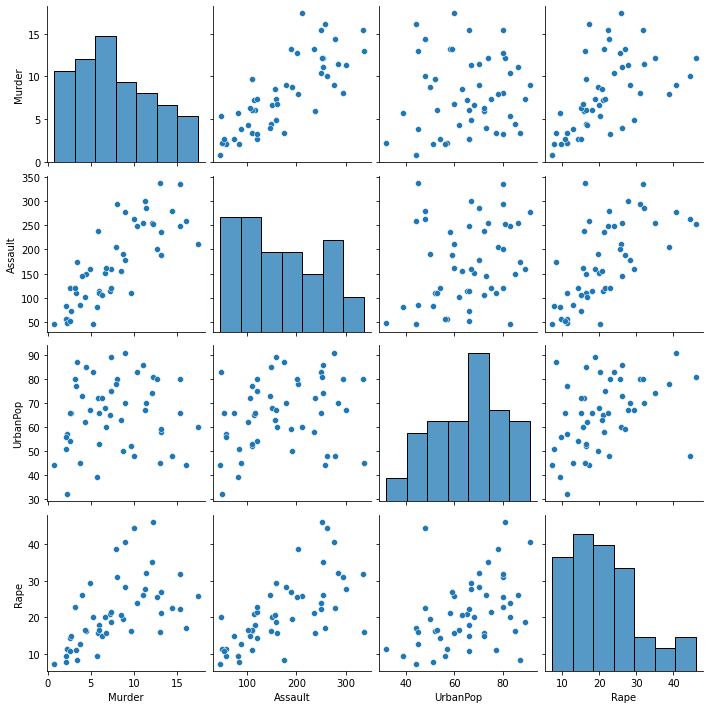

In [133]:
sns.pairplot(cri_data)

In [134]:
cri_ex=cri_data.iloc[:,1:5]
cri_ex.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [135]:
scaler = StandardScaler()
cri_scl=scaler.fit_transform(cri_ex)
cri_scl

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [136]:
dbscan= DBSCAN(eps=0.9,min_samples=3)
dbscan_y=dbscan.fit_predict(cri_scl)

In [137]:
dbscan

DBSCAN(eps=0.9, min_samples=3)

In [138]:
dbscan_y

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3, -1,  3,  1, -1, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  4,  1, -1, -1,  1,  0,  2,  4, -1,  1,  4,  1,  1,  1],
      dtype=int64)

In [140]:
cluster = pd.DataFrame(dbscan_y,columns=['cluster']) 
cluster 

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [141]:
cri_data['cluster']=cluster
cri_data

,Country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [142]:
cri_data['cluster'].value_counts()

 1    20
-1    17
 0     4
 2     3
 3     3
 4     3
Name: cluster, dtype: int64

In [143]:
cri_data[cri_data['cluster']==-1]

,Country,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
10,Hawaii,5.3,46,83,20.2,-1
20,Massachusetts,4.4,149,85,16.3,-1
23,Mississippi,16.1,259,44,17.1,-1


In [144]:
cri_data[cri_data['cluster']==0]

,Country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
41,Tennessee,13.2,188,59,26.9,0


In [146]:
cri_data[cri_data['cluster']==1]

,Country,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1


In [147]:
cri_data[cri_data['cluster']==2]

,Country,Murder,Assault,UrbanPop,Rape,cluster
12,Illinois,10.4,249,83,24.0,2
31,New York,11.1,254,86,26.1,2
42,Texas,12.7,201,80,25.5,2


In [148]:
cri_data[cri_data['cluster']==3]

,Country,Murder,Assault,UrbanPop,Rape,cluster
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
30,New Mexico,11.4,285,70,32.1,3


In [149]:
cri_data[cri_data['cluster']==4]

,Country,Murder,Assault,UrbanPop,Rape,cluster
36,Oregon,4.9,159,67,29.3,4
43,Utah,3.2,120,80,22.9,4
46,Washington,4.0,145,73,26.2,4


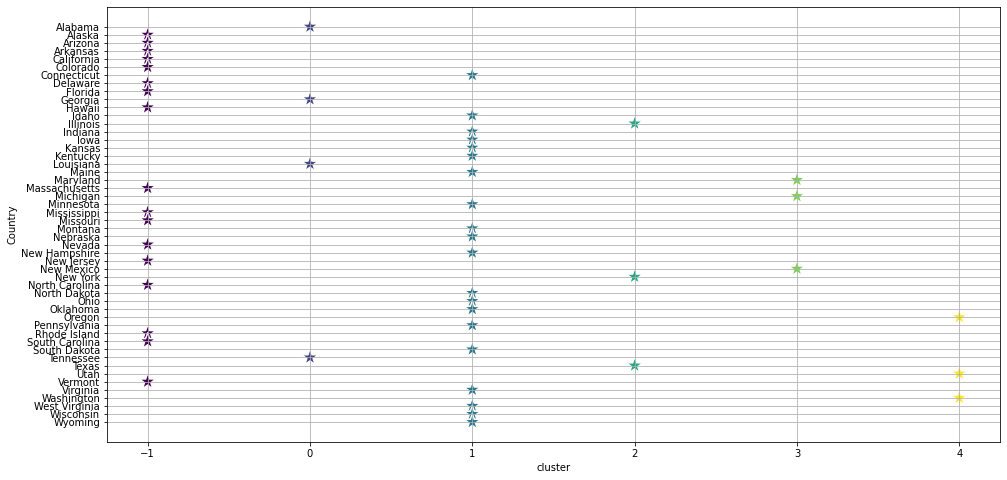

In [150]:
plt.figure(figsize=(16,8))
sns.scatterplot(cri_data['cluster'],cri_data['Country'], c=dbscan.labels_, s=300,marker='*') 
plt.grid()
plt.show()